<a href="https://colab.research.google.com/github/holandajuan/metodos-numericos/blob/main/metodo_falsa_posicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def false_pos(f, a, b, epsilon, max_iterations = 50):
    """Implementação do método da falsa posição para encontrar raízes de uma função
       no intervalo [a,b] com precição epsilon. O método executa no máximo max_iterations
       iterações.
       Retorna um tupla (erro, raiz), erro sendo um valor booleano.
    """
    runs = []
    Fa = f(a)
    Fb = f(b)

    if (Fa * Fb) > 0:
        print("Erro: A função não muda de sinal")
        return (True, None, runs)

    intervalX = abs(b-a)

    if intervalX <= epsilon:
        return (False, a, runs) # return a/b

    if abs(Fa) <= epsilon:
        return (False, a, runs)

    if abs(Fb) <= epsilon:
        return (False, b, runs)



    header = ("k".center(4) + "a".center(12) + "f(a)".center(12) +
              "b".center(12) + "f(b)".center(12) + "x".center(12) +
              "f(x)".center(12) + "intervalo".center(12))
    print(header)
    print("-" * len(header))

    for i in range(1, max_iterations+1):
        x = (a * Fb - b * Fa) / (Fb - Fa)
        Fx = f(x)
        runs.append((i, a, Fa, b, Fb, x, Fx))

        print(f"{i:4}{a:12.6f}{Fa:12.6f}{b:12.6f}{Fb:12.6F}"
              f"{x:12.6f}{Fx:12.6f}{intervalX:12.6f}")

        if abs(Fx) <= epsilon:
            return (False, x, runs)

        if Fa * Fx > 0: # função muda de sinal entre x e b
            a = x
            Fa = Fx
        else:   # função muda de sinal entre a e x
            b = x
            Fb = Fx

        intervalX = abs(b-a)
        if intervalX <= epsilon:
            return (False, x, runs)

    print("Erro: número máximo de iterações atingido")
    return (True, x, runs)


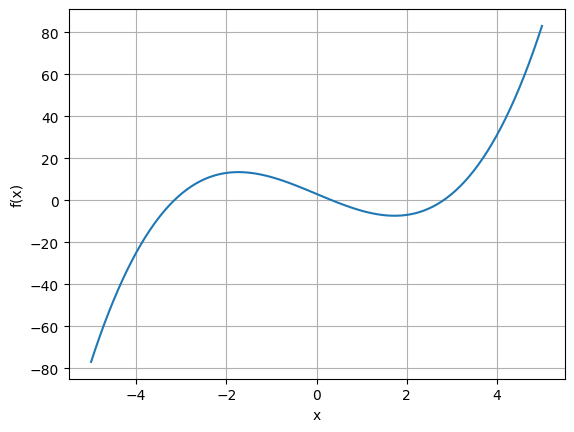

In [3]:
def f(x):
    return x**3 - 9*x + 3

x = np.linspace(-5, 5, 100) # cria intervalo de valores para x
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()



In [4]:
epsilon = 0.001
max_iterations = 20

x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
# tabela para os valores de x
print(" x |    f(x)")
print("-----------")
a = []
b = []
for i,xi in enumerate(x): # iteração para verificar troca de sinal
    print(f"{xi:2} | {f(xi):5}")
    if (i < len(x)):
        if (f(xi)*f(xi+1) < 0):
            a.append(xi)
            b.append(xi+1)

a, b

 x |    f(x)
-----------
-5 |   -77
-4 |   -25
-3 |     3
-2 |    13
-1 |    11
 0 |     3
 1 |    -5
 2 |    -7
 3 |     3
 4 |    31
 5 |    83


([-4, 0, 2], [-3, 1, 3])

In [5]:
for ab in zip(a, b):
    (erro, raiz, runs) = false_pos(f, ab[0], ab[1], epsilon, max_iterations)
    print(f"Raiz encontrada: {raiz}\n")


 k       a          f(a)         b          f(b)         x          f(x)     intervalo  
----------------------------------------------------------------------------------------
   1   -4.000000  -25.000000   -3.000000    3.000000   -3.107143    0.966882    1.000000
   2   -4.000000  -25.000000   -3.107143    0.966882   -3.140389    0.292858    0.892857
   3   -4.000000  -25.000000   -3.140389    0.292858   -3.150342    0.087027    0.859611
   4   -4.000000  -25.000000   -3.150342    0.087027   -3.153289    0.025714    0.849658
   5   -4.000000  -25.000000   -3.153289    0.025714   -3.154159    0.007585    0.846711
   6   -4.000000  -25.000000   -3.154159    0.007585   -3.154416    0.002236    0.845841
   7   -4.000000  -25.000000   -3.154416    0.002236   -3.154491    0.000659    0.845584
Raiz encontrada: -3.1544913947541646

 k       a          f(a)         b          f(b)         x          f(x)     intervalo  
------------------------------------------------------------------------

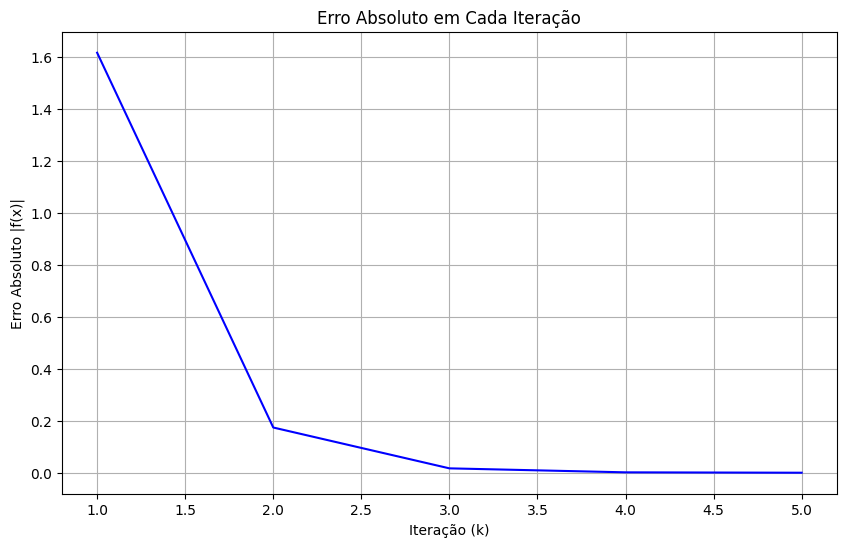

In [6]:
# Supondo que 'runs' seja uma lista com os resultados de cada iteração
# contendo (k, a, Fa, b, Fb, x, Fx)

x = []
y = []

for r in runs: # runs deve conter os dados de cada iteração
    x.append(r[0]) # r[0] -> k (número da iteração)
    y.append(abs(r[6])) # r[6] -> Fx (valor da função em x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.xlabel("Iteração (k)")
plt.ylabel("Erro Absoluto |f(x)|")
plt.title("Erro Absoluto em Cada Iteração")
plt.grid(True)
plt.show()